# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1304 Ярусова Татьяна. Вариант №53.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

### Обозначения
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на единицу длина бинарной записи числа n.<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа n (количество единиц в бинарной записи).

### Бинарный метод "SX"
#### Алгоритм
<ol>
    <li>Запись натурального числа n в бинарном виде: $$n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$$</li>
    <li>Отбрасываем старший бит.</li>
    <li>Делаем замену по следующему правилу:
        $$a_{i} = 1 \rightarrow a_{i} = "SX"$$
        $$a_{i} = 0 \rightarrow a_{i} = "S"$$</li>
    <li>Выполнение вычислений, где "S" - возведение в квадрат, а "X" - умножение на x.</li>
</ol>

#### Оценка
Число операций для бинарного метода "SX": $$\lambda(n) + \nu(n) - 1$$

### Бинарный метод возведения в степень справа налево
#### Алгоритм
<ol>
    <li>Задаём начальные условия: $N=n$, $Y=1$, $Z=x$.</li>
    <li>Проверяем $N$ на чётность. Если $N$ чётно – переходим к пункту 3, иначе – к пункту 4.</li>
    <li>$N = floor(N/2), Z = Z * Z$. Переходим к пункту 2.</li>
    <li>$N = floor(N/2), Y = Z * Y$.</li>
    <li>Если $N = 0$, то возвращаем $Y$, что и является ответом. Иначе $Z = Z * Z$ и переходим к пункту 2.</li>
</ol>

#### Оценка
Число операций для бинарного метода возведения в степень справа налево: $$\lambda(n) + \nu(n)$$

### Метод простых множителей
#### Алгоритм
<ol>
    <li>Представляем $n=p*q$, где $p$ – наименьший простой множителей $n$, $q > 1$; Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$.</li>
    <li>Если $n$ – простое, то можно сначала вычислить $x^{n-1}$ и затем умножить его на $x$.</li>
    <li>При $n = 1$ получаем $x^n$ безо всяких вычислений</li>
</ol>
Применяя эти правила, можно получить $x^n$.

### Дерево степеней
#### Алгоритм
<ol>
    <li> Пусть построен $k-ый$ уровень дерева. Необходимо построить $(k+1)-ый$ уровень.</li>
    <li> Берем каждый узел на $k$-ом уровне слева направо и присоединяем к нему снизу узлы $$n + a_{0}, n + a_{1}, ..., n + a_{k} = 2n.$$ Важен порядок записи узлов, поэтому множество $a_{i}$ представляют собой путь от корня до $n$, где $a_{0} = 1$.</li>
    <li>Если узел уже есть, то в дерево он повторно не вносится</li>
</ol>

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод "SX"

Реализуем функцию SX_method(), которая на вход принимает целочисленное значение, являющуеся степенью, в которую необходимо возвести переменную x.
Внутри функции полученное целочисленное значение представляется в бинарном виде без первого бита. Далее по полученной бинарной записи строится строка из элементов "S" и "X", где 1 - "SX", а 0 - "S".
Переменная result будет хранить промежуточные и в конечном итоге финальный результат работы алгоритма. По полученной строке "SX" будут производиться операции над переменной result. "S" - возведение в квадрат, "X" - умножение на x.

In [70]:
def SX_method(number):

    # Представление заданного числа в бинарном виде без старшего бита
    bin_num = str(bin(number))[3:]

    # Преобразование бинарной записи в строку из элементов "S" и "X"
    SX_str = ''
    for elem in bin_num:
        if elem == '1':
            SX_str += "SX"
        else:
            SX_str += "S"
    print("Строка вида SX:", SX_str)

    # Выполнение вычислений и вывод результата после каждой итерации
    result = x
    count_iter = 0
    for elem in SX_str:
        if elem == "S":
            result *= result
        else:
            result *= x
            
        count_iter += 1
        print(result, end=' ')
    print("\nКоличество операций:", count_iter)
    return result, count_iter

Проверим работоспособность вышенаписанной функции на нескольких числах, а именно на 26, 37, 89

In [18]:
answer = SX_method(26)

Строка вида SX: SXSSXS
x^2 x^3 x^6 x^12 x^13 x^26 
Количество операций: 6


In [19]:
answer = SX_method(37)

Строка вида SX: SSSXSSX
x^2 x^4 x^8 x^9 x^18 x^36 x^37 
Количество операций: 7


In [20]:
answer = SX_method(89)

Строка вида SX: SSXSXSSSX
x^2 x^4 x^5 x^10 x^11 x^22 x^44 x^88 x^89 
Количество операций: 9


Проведем теоретическую оценку числа операций метода для данных n:<br>
$n = 26 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 6$<br>
$n = 37 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 7$<br>
$n = 89 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 6; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 9$<br>
Теоретические данные совпадают с практическими. Таким образом, можно сделать вывод, что бинарный алгоритм "SX" реализован корректно.

#### Вывод

Реализован бинарный метод "SX". На нескольких числах проверена его работоспособность. Также проведена теоретическая оценка числа операций для данных чисел. 
Данный метод является простым в реализации и при этом способен за достаточное малое количество шагов вычислить одночлен.

### 2. Бинарный метод возведения в степень справа налево

Реализуем функцию RightToLeft_method(), которая на вход принимает целочисленное значение, являющуеся степенью, в которую необходимо возвести переменную x. Внутри функции происходит инициализация переменных N, Z, Y. В зависимости от N совершаются действия над Z и Y. Если N = 0, то алгоритм заканчивает свою работу. На каждом шаге выводится информация о количестве совершенных итераций, текущее значение N, X и Y.

In [29]:
def RightToLeft_method(number):
    # Инициализация переменных 
    N = number
    Y = 1
    Z = x
    count_iter = 0
    count_op = 0
    
    # Реализация алгоритма
    while True:
        print("№ итерации:", count_iter, "Значение N:", N, "Значение Y", Y, "Значнеие Z", Z )    

        if N % 2 == 0:
            N = floor(N/2)
            Z *= Z
            count_op += 1
        else:
            N = floor(N/2)
            Y *= Z
            count_op += 1
            if N == 0:
                count_iter += 1
                break
            Z *= Z
            count_op += 1
            
        count_iter += 1
    print("№ итерации:", count_iter, "Значение N:", N, "Значение Y", Y, "Значнеие Z", Z )
    print("Количество операций:", count_op)
    return Y               

In [30]:
answer = RightToLeft_method(26)

№ итерации: 0 Значение N: 26 Значение Y 1 Значнеие Z x
№ итерации: 1 Значение N: 13 Значение Y 1 Значнеие Z x^2
№ итерации: 2 Значение N: 6 Значение Y x^2 Значнеие Z x^4
№ итерации: 3 Значение N: 3 Значение Y x^2 Значнеие Z x^8
№ итерации: 4 Значение N: 1 Значение Y x^10 Значнеие Z x^16
№ итерации: 5 Значение N: 0 Значение Y x^26 Значнеие Z x^16
Количество операций: 7


Результат вывода метода справа налево числа 26:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 26         | 1          | x          |
| 1          | 13         | 1          | $x^{2}$        |
| 2          | 6          | $x^{2}$        | $x^{4}$        |
| 3          | 3          | $x^{2}$        | $x^{8}$        |
| 4          | 1          | $x^{10}$       | $x^{16}$       |
| 5          | 0          | $x^{25}$       | $x^{16}$       |

In [31]:
answer = RightToLeft_method(37)

№ итерации: 0 Значение N: 37 Значение Y 1 Значнеие Z x
№ итерации: 1 Значение N: 18 Значение Y x Значнеие Z x^2
№ итерации: 2 Значение N: 9 Значение Y x Значнеие Z x^4
№ итерации: 3 Значение N: 4 Значение Y x^5 Значнеие Z x^8
№ итерации: 4 Значение N: 2 Значение Y x^5 Значнеие Z x^16
№ итерации: 5 Значение N: 1 Значение Y x^5 Значнеие Z x^32
№ итерации: 6 Значение N: 0 Значение Y x^37 Значнеие Z x^32
Количество операций: 8


Результат вывода метода справа налево числа 37:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 37         | 1          | x          |
| 1          | 18         | x          | $x^{2}$        |
| 2          | 9          | x          | $x^{4}$        |
| 3          | 4          | $x^{5}$        | $x^{8}$        |
| 4          | 2          | $x^{5}$        | $x^{16}$       |
| 5          | 1          | $x^{5}$        | $x^{32}$       |
| 6          | 0          | $x^{37}$       | $x^{32}$       |

In [32]:
answer = RightToLeft_method(89)

№ итерации: 0 Значение N: 89 Значение Y 1 Значнеие Z x
№ итерации: 1 Значение N: 44 Значение Y x Значнеие Z x^2
№ итерации: 2 Значение N: 22 Значение Y x Значнеие Z x^4
№ итерации: 3 Значение N: 11 Значение Y x Значнеие Z x^8
№ итерации: 4 Значение N: 5 Значение Y x^9 Значнеие Z x^16
№ итерации: 5 Значение N: 2 Значение Y x^25 Значнеие Z x^32
№ итерации: 6 Значение N: 1 Значение Y x^25 Значнеие Z x^64
№ итерации: 7 Значение N: 0 Значение Y x^89 Значнеие Z x^64
Количество операций: 10


Результат вывода метода справа налево числа 89:

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 89         | 1          | x          |
| 1          | 44         | x          | $x^{2}$        |
| 2          | 22         | x          | $x^{4}$        |
| 3          | 11         | x          | $x^{8}$        |
| 4          | 5          | $x^{9}$        | $x^{16}$       |
| 5          | 2          | $x^{25}$       | $x^{32}$       |
| 6          | 1          | $x^{25}$       | $x^{64}$       |
| 7          | 0          | $x^{89}$       | $x^{64}$       |

Проведем теоретическую оценку числа операций метода для данных n:<br>
$n = 26 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 3; \lambda(n) + \nu(n) = 7$<br>
$n = 37 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) = 8$<br>
$n = 89 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 6; \nu(n) = 4; \lambda(n) + \nu(n) = 10$<br>
Теоретические данные совпадают с практическими. Таким образом, можно сделать вывод, что бинарный алгоритм справа налево реализован корректно.

#### Вывод

Реализован бинарный метод возведения в степень справа налево. На нескольких числах проверена его работоспособность. Также проведена теоретическая оценка числа операций для данных чисел. 
Данный метод является менее простым в реализации, но при этом способен также за достаточно малое количество шагов вычислить одночлен.
После завершения алгоритма переменная Z в общем случае будет равна $x^{2^{m-1}}$, где m - число итераций метода.

### 3. Сравнение бинарного метода "SX" и метода возведения в степень справа налево.

Исходя из теоретической оценки двух этих алгоритмов, можно сделать вывод, что бинарному алгоритму "SX" требуется на одну операцию меньше, чем алгоритму возведения в степень слева направо. 
Но также можно отметить, что алгоритм возведения в степень слева направо работает за меньшее количество итераций, чем бинарный метод "SX".
Таким образом, бинарный алгоритм "SX" является выгоднее алгоритма возведения в степень слева направо.

### 4. Метод множителей.

Для ранее приведенных n, равных 26, 37 и 89, вручную выполним метод множителей. 

#### Метод множителей для n = 26:

$x^{26} = (x^{2})^{13}$<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$y = x^2$<br>
$y^{13} = y * y^{12}$ (1 операция)<br>
$y^{12} = (y^{2})^{6}$<br>
$y^2 \rightarrow y, y^2$ (1 операция)<br>
$z = y^2$<br>
$z^{6} = (z^{2})^{3}$<br>
$z^{2} \rightarrow z, z^{2}$ (1 операция)<br>
$m = z^{2}$<br>
$m^{3} \rightarrow m, m^{2}, m^{3}$ (2 операции)<br>
Итого: 6 операций

Данный пример иллюстрирует, что метод простых множителей работает быстрее (за 6 операций), чем метод возведения в степень слева направо (за 7 операций).

#### Метод множителей для n = 37:

$x^{37} = x * x^{36}$ (1 операция)<br>
$x^{36} = (x^{3})^{12}$<br>
$x^{3} \rightarrow x, x^{2}, x^{3}$ (2 операции)<br>
$y = x^{3}$<br>
$y^{12} = (y^{2})^{6}$<br>
$y^2 \rightarrow y, y^2$ (1 операция)<br>
$z = y^2$<br>
$z^{6} = (z^{2})^{3}$<br>
$z^{2} \rightarrow z, z^{2}$ (1 операция)<br>
$m = z^{2}$<br>
$m^{3} \rightarrow m, m^{2}, m^{3}$ (2 операции)<br>
Итого: 7 операций

Данный пример иллюстрирует, что метод простых множителей работает быстрее (за 7 операций), чем метод возведения в степень слева направо (за 8 операций).

#### Метод множителей для n = 89:

$x^{89} = x * x^{88}$ (1 операция)<br>
$x^{88} = (x^{2})^{44}$<br>
$x^{2} \rightarrow x, x^{2}$ (1 операция)<br>
$y = x^{2}$<br>
$y^{44} = (y^{2})^{22}$<br>
$y^2 \rightarrow y, y^2$ (1 операция)<br>
$z = y^2$<br>
$z^{22} = (z^{2})^{11}$<br>
$z^{2} \rightarrow z, z^{2}$ (1 операция)<br>
$m = z^{2}$<br>
$m^{11} = m * m^{10}$ (1 операция)<br>
$m^{10} = (m^{2})^{5}$<br>
$k = m^{2}$<br>
$k^{5} \rightarrow k, k^{2}, k^{4}, k^{5}$ (3 операции)<br>
Итого: 8 операций

Данный пример иллюстрирует, что метод простых множителей работает быстрее (за 8 операций), чем метод возведения в степень слева направо (за 10 операций) и бинарный метод "SX" (за 9 операций).

Приведем пример, когда метод простых множителей будет работать за большее количество операций. Рассмотрим n = 65:

Результат работы метода "SX":

In [3]:
answer = SX_method(65)

Строка вида SX: SSSSSSX
x^2 x^4 x^8 x^16 x^32 x^64 x^65 
Количество операций: 7


Результат работы метода простых множителей:

$x^{65} = (x^{5})^{13}$<br>
$x^{5} \rightarrow x, x^{2}, x^{4}, x^{5}$(3 операции)<br>
$y = x^{5}$<br>
$y^{13} = y * y^{12}$(1 операция)<br>
$y^{12} = (y^{2})^{6}$<br>
$y^2 \rightarrow y, y^2$(1 операция)<br>
$z = y^2$<br>
$z^{6} = (z^{2})^{3}$<br>
$z^{2} \rightarrow z, z^{2}$(1 операция)<br>
$m = z^{2}$<br>
$m^{3} \rightarrow m, m^{2}, m^{3}$(2 операции)<br>
Итого: 8 операций

Данный пример иллюстрирует, что метод простых множителей не всегда работает быстрее бинарного метода "SX".

#### Вывод.

Методом простых множителей достаточно легко вручную вычислить число операций для возведения числа в степень. В больших случаях данный метод работает быстрее, чем метод "SX" и метод возведения в степень справа налево.<br>
Однако, данный метод будет достаточно тяжело реализовать в виде кода, поэтому проще им пользоваться вручную.

### 5. Алгоритм "дерево степеней".

Реализуем алгоритм "дерева степеней".<br> 
Метод build_tree() строит дерево до заданного уровня.<br> 
Метод get_edge_path() ищет путь от корня до заданной вершины. Если данный путь существует, то функция его возвращает, если нет, то выводит сообщение об ошибке и возвращает None.<br>
Метод print_tree() выводит дерево на экран и рисует путь от корня дерева к заданной вершине, если он существует.

In [50]:
def build_tree(level):
    # С помощью встроенного класса Graph() создаем граф с вершиной 1
    tree = Graph({1:[]})
    current_level_nodes = [1]
    # Так как первый уровень уже построен, начинаем со второго
    for current_level in range(1, level):
        new_nodes = []
        for parent in current_level_nodes:
            # Находим список вершин от корня до вершины родителя
            path = tree.shortest_path(1, parent)
            for vertice in path:
                new_vert = parent + vertice
                # Если новая вершина отсутствует в дереве, тогда добавляем ее
                if new_vert not in tree.vertices():
                    tree.add_vertex(new_vert)
                    tree.add_edge(parent, new_vert)
                    new_nodes.append(new_vert)
        current_level_nodes = new_nodes   
    return tree
        
def get_edge_path(tree, node):
    path = []
    try:
        # Находим путь, составленный из вершин
        vertice_path = tree.shortest_path(1, node)
   
    except ValueError:
        # В случае, если вершина отсутствует, выводим сообщение
        print("В дереве отсутствует заданная вершина:", node)
        print("Попробуйте задать уровень побольше.")
        return None, None
    
    else:
        # Если вершина находится в дереве, то находим путь, составленный из ребер
        for i in range(len(vertice_path)-1):
            path.append((vertice_path[i], vertice_path[i+1]))
        return path, vertice_path
        
def print_tree(level, node):
    tree = build_tree(level)
    path_edge, path_nodes = get_edge_path(tree, node)
    if path_edge == None:
        plt = tree.plot(layout = 'tree', figsize=(20, 30), tree_root = 1)
    else:
        plt = tree.plot(layout = 'tree', figsize=(20, 30), tree_root = 1, edge_colors = {(1, 0, 0): path_edge})
        print("Путь:", path_nodes)
    plt.show()

Продемонстрируем работу алгоритма на ранее приведенных n: 26, 37 и 89.

Нарисуем дерево 6-го уровня и попробуем найти в нем число 26.

В дереве отсутствует заданная вершина: 26
Попробуйте задать уровень побольше.


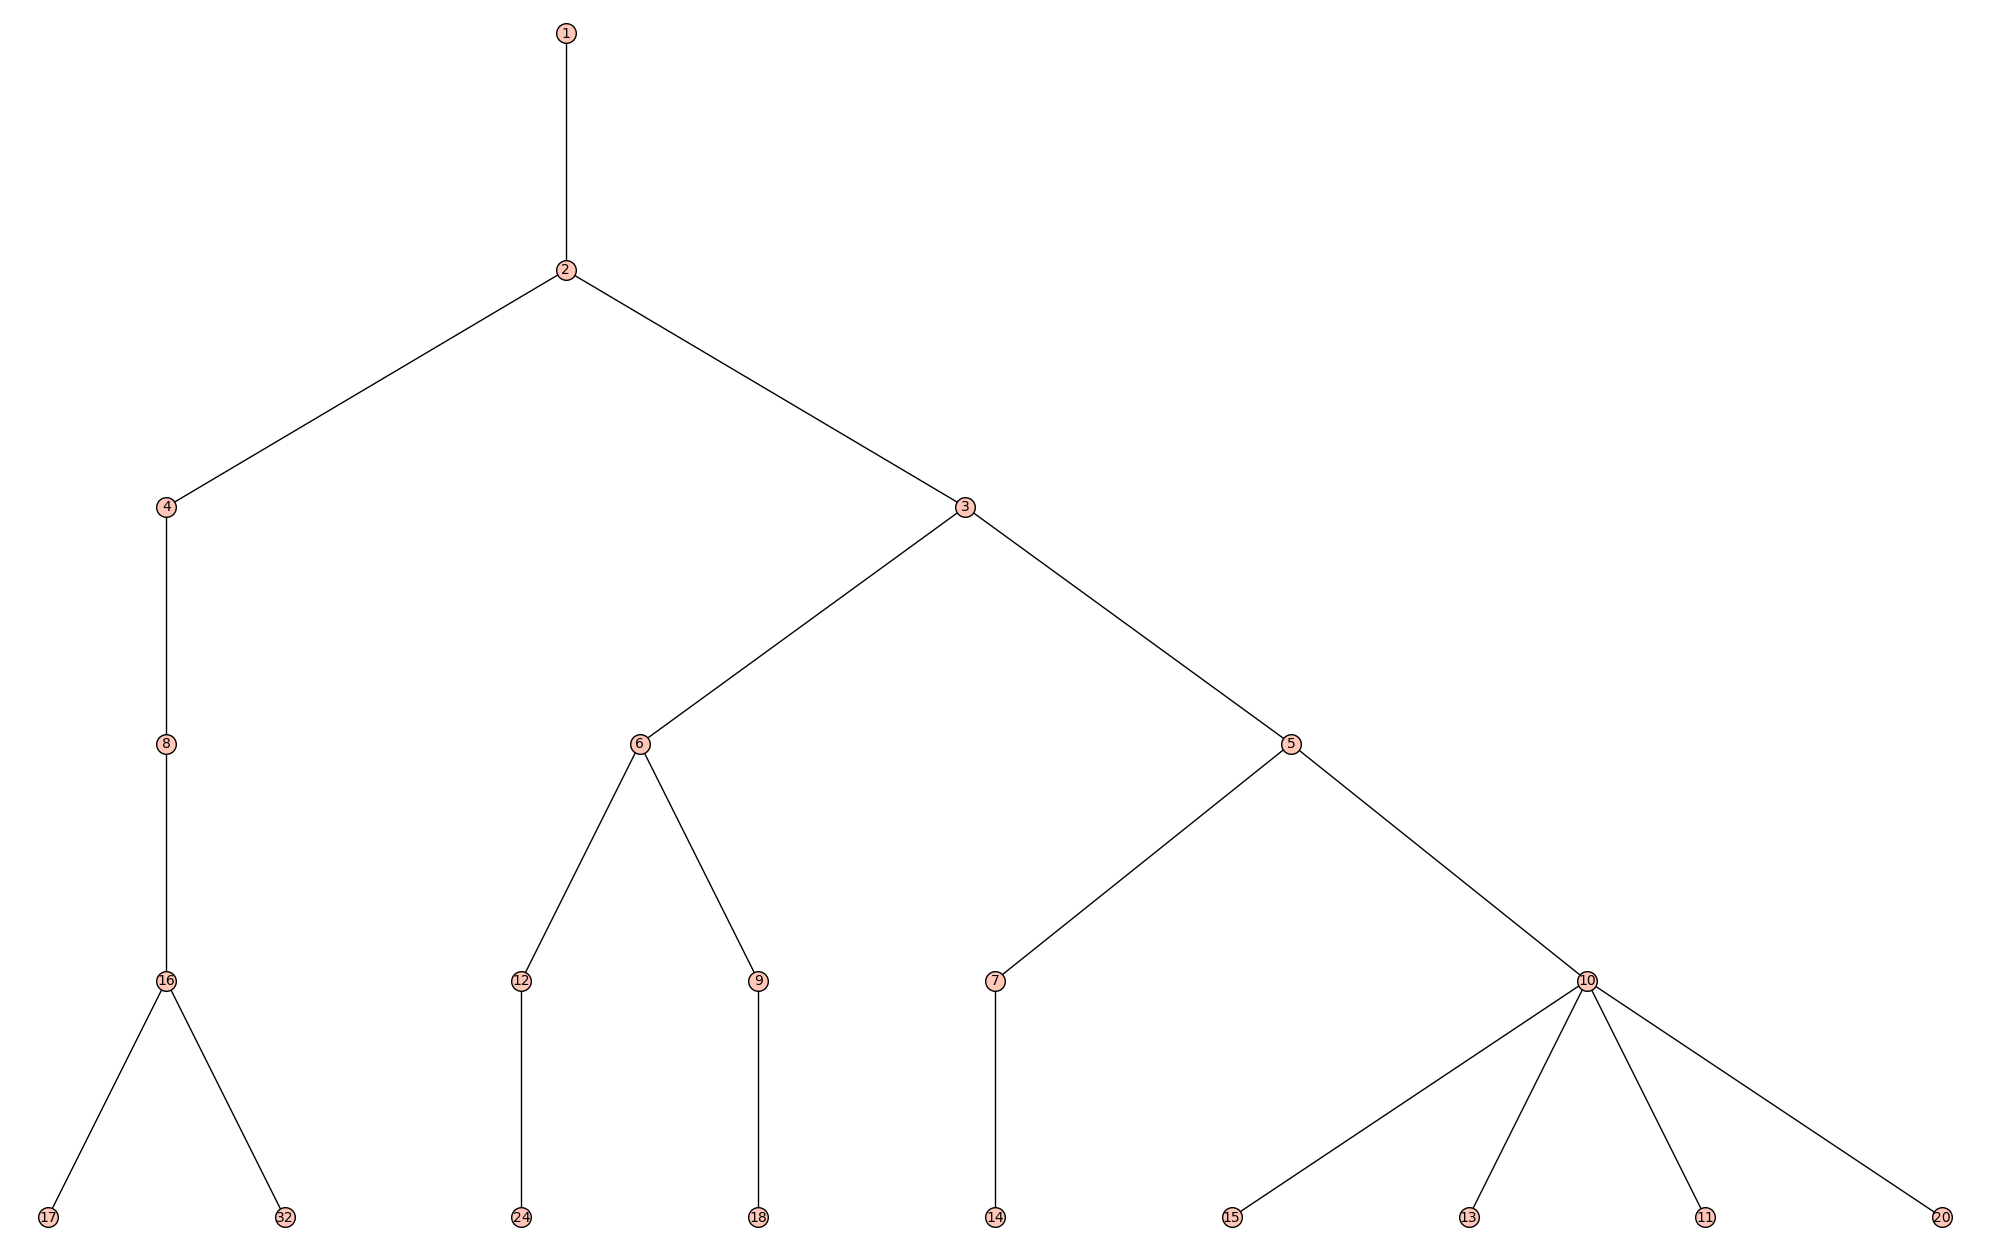

In [51]:
print_tree(6, 26)

Программа построило дерево до 6-го уровня и вывело сообщение об ошибке, т.к. число 26 находится на старшем уровне и отсутствует в текущем дереве. <br>
Нарисуем дерево 7-го уровня и найдем в нем число 26:

Путь: [1, 2, 3, 5, 10, 13, 26]


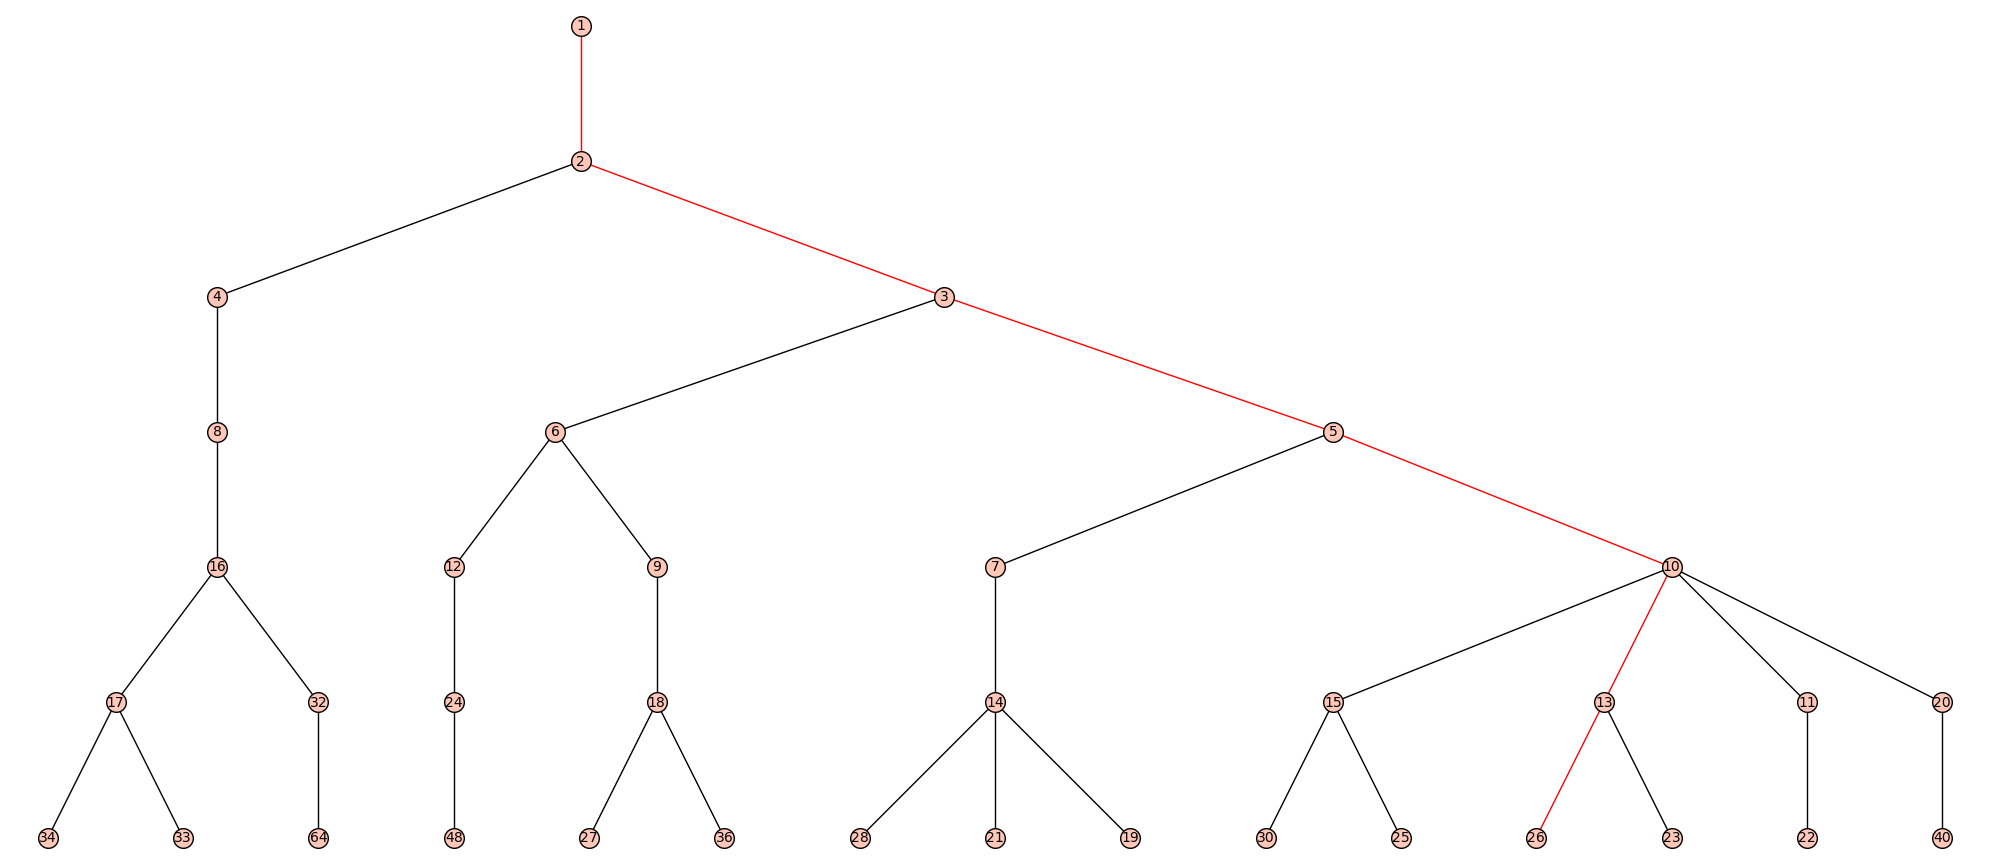

In [54]:
print_tree(7, 26)

Видим, что программа нарисовала дерево, выделила в нем путь от 1 до 26 красным цветом и дополнительно вывела список вершин, входящих в путь.

Проверим работу программу на других числах. <br>
Нарисуем дерево 8-го уровня и найдем в нем число 37:

Путь: [1, 2, 3, 6, 9, 18, 36, 37]


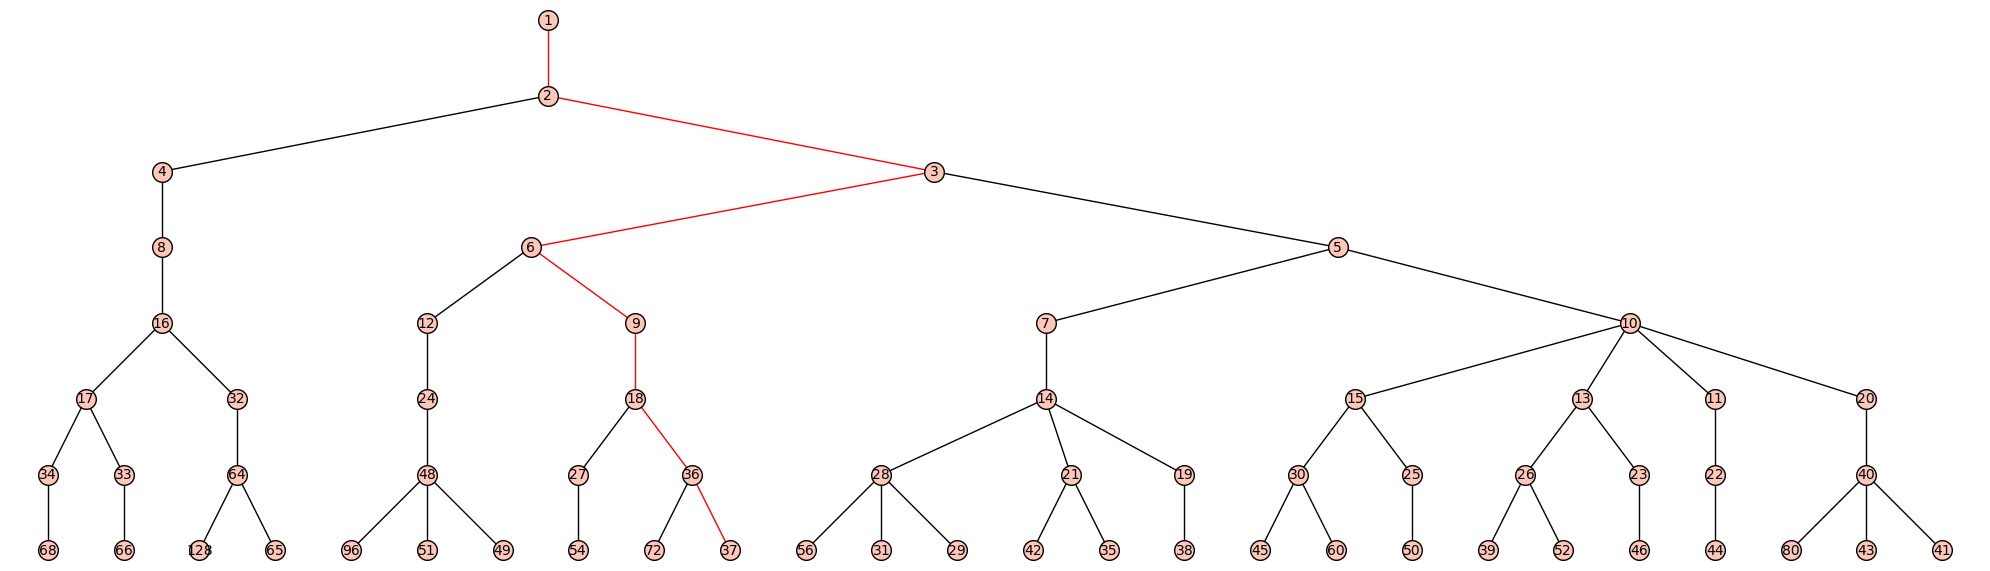

In [55]:
print_tree(8, 37)

Программа нарисовала корректное дерево.

Нарисуем дерево 10-го уровня и найдем в нем число 89:

Путь: [1, 2, 3, 5, 7, 14, 21, 42, 47, 89]


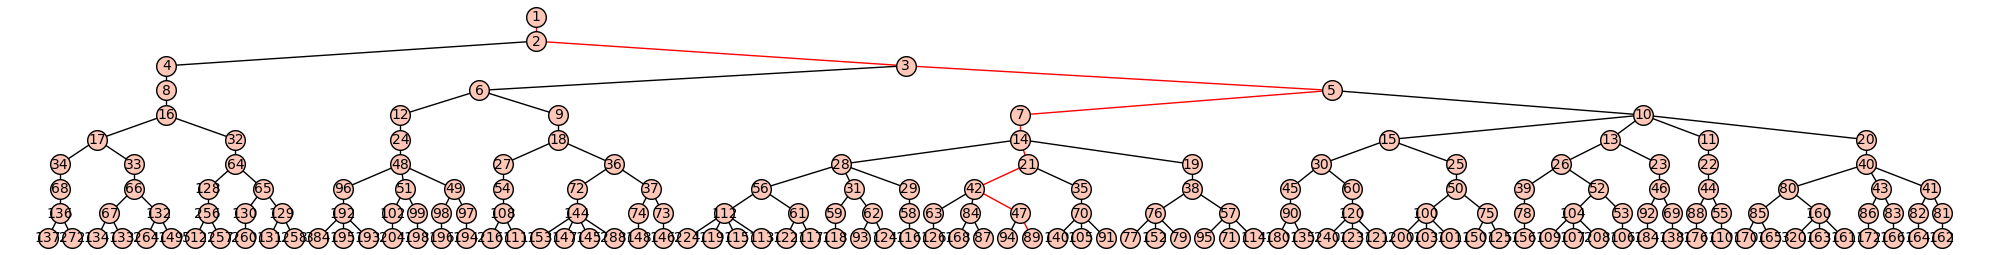

In [56]:
print_tree(10, 89)

Программа нарисовала корректное дерево.

Сравним алгоритм "дерево степеней" с алгоритмами возведения в степень справа налево и с бинарным методом "SX".<br>
Напишем для этого функцию comparison_method().

Необходимо немного модифицировать функции SX_method() и RightToLeft_method, убрав из них промежуточные выводы.

In [75]:
def sx_method(number):
    bin_num = str(bin(number))[3:]
    SX_str = ''
    for elem in bin_num:
        if elem == '1':
            SX_str += "SX"
        else:
            SX_str += "S"
    result = x
    count_iter = 0
    for elem in SX_str:
        if elem == "S":
            result *= result
        else:
            result *= x
            
        count_iter += 1
    return result, count_iter

In [76]:
def RightToLeft(number):
    N = number
    Y = 1
    Z = x
    count_iter = 0
    count_op = 0
    while True:
        if N % 2 == 0:
            N = floor(N/2)
            Z *= Z
            count_op += 1
        else:
            N = floor(N/2)
            Y *= Z
            count_op += 1
            if N == 0:
                count_iter += 1
                break
            Z *= Z
            count_op += 1
            
        count_iter += 1
    return count_op               

Проверим скорость работы алгоритмов на первых 3000 числах:

In [82]:
def comparison_method():
    # Построение дерева до 17 уровня
    tree = build_tree(17)
    # Сравнение с методом SX
    for number in range(2, 3001):
        path_edge, path_nodes = get_edge_path(tree, number)
        result, count_iter = sx_method(number)
        if (len(path_nodes) - 1) > count_iter:
            print("Алгоритм <<дерево степеней>> не всегда работает быстрее бинарного метода <<SX>>.")
            print("На числе", number, "<<дерево степеней>> работает медленнее.")
            return
    print("Алгоритм <<дерево степеней>> работает быстре, чем бинарный метод <<SX>>.")
    
    # Сравнение с методом возведения в степень справа налево
    for number in range(2, 3001):
        path_edge, path_nodes = get_edge_path(tree, number)
        count_iter = RightToLeft(number)
        if (len(path_nodes) - 1) > count_iter:
            print("Алгоритм <<дерево степеней>> не всегда работает быстрее возведения в степень справа налево.")
            print("На числе", number, "<<дерево степеней>> работает медленнее.")
            return
    print("Алгоритм <<дерево степеней>> работает быстре, чем метод возведения в степень справа налево.")

Запустим функцию сравнения методов:

In [83]:
comparison_method()

Алгоритм <<дерево степеней>> работает быстре, чем бинарный метод <<SX>>.
Алгоритм <<дерево степеней>> работает быстре, чем метод возведения в степень справа налево.


#### Вывод

Реализован алгоритм "дерево степеней". Средствами SageMath было построено до заданного уровня k и отображено дерево, в котором цветом выделен путь от корня до заданной вершины n.<br>
В ходе сравнения алгоритма "дерево степеней" с бинарным методом "SX" и методом возведения в степень справа налево установлено, что "дерево степеней" является самым оптимальным и эффективным алгоритмом.

### 6*. Измененное дерево степеней.

Внесем незначительные изменения в определение дерева степеней, чтобы узлы, расположенные ниже n присоединялись в порядке убывания<br>$$i+a_{k-1}, ..., i+a_{1},i+a_{0}$$<br> а не возрастания. Тем самым получим дерево убывающих степеней.

In [134]:
def build_tree_decreasing(level):
    # С помощью встроенного класса Graph() создаем граф с вершиной 1
    tree = Graph({1:[]})
    current_level_nodes = [1]
    # Так как первый уровень уже построен, начинаем со второго
    for current_level in range(1, level):
        new_nodes = []
        for parent in current_level_nodes:
            # Находим список вершин от корня до вершины родителя
            path = tree.shortest_path(1, parent)
            for vertice in path:
                new_vert = parent + vertice
                # Если новая вершина отсутствует в дереве, тогда добавляем ее
                if new_vert not in tree.vertices():
                    tree.add_vertex(new_vert)
                    tree.add_edge(parent, new_vert)
                    new_nodes.append(new_vert)
        current_level_nodes = sorted(new_nodes)[::-1]  # Чтобы получить дерево убывающих степеней, необходимо записать новые
                                                       # вершины в обратном порядке
    return tree
        
def get_edge_path_decreasing(tree, node):
    path = []
    try:
        # Находим путь, составленный из вершин
        vertice_path = tree.shortest_path(1, node)
   
    except ValueError:
        # В случае, если вершина отсутствует, выводим сообщение
        print("В дереве отсутствует заданная вершина:", node)
        print("Попробуйте задать уровень побольше.")
        return None, None
    
    else:
        # Если вершина находится в дереве, то находим путь, составленный из ребер
        for i in range(len(vertice_path)-1):
            path.append((vertice_path[i], vertice_path[i+1]))
        return path, vertice_path
        
def print_tree_decreasing(level, node):
    tree = build_tree_decreasing(level)
    path_edge, path_nodes = get_edge_path_decreasing(tree, node)
    if path_edge == None:
        plt = tree.plot(layout = 'tree', figsize=(20, 30), tree_root = 1)
    else:
        plt = tree.plot(layout = 'tree', figsize=(20, 30), tree_root = 1, edge_colors = {(1, 0, 0): path_edge})
        print("Путь:", path_nodes)
    plt.show()

Продемонстрируем работу алгоритма на ранее приведенных n: 26, 37 и 89.

Нарисуем дерево 7-го уровня и найдем в нем число 26:

Путь: [1, 2, 4, 8, 16, 24, 26]


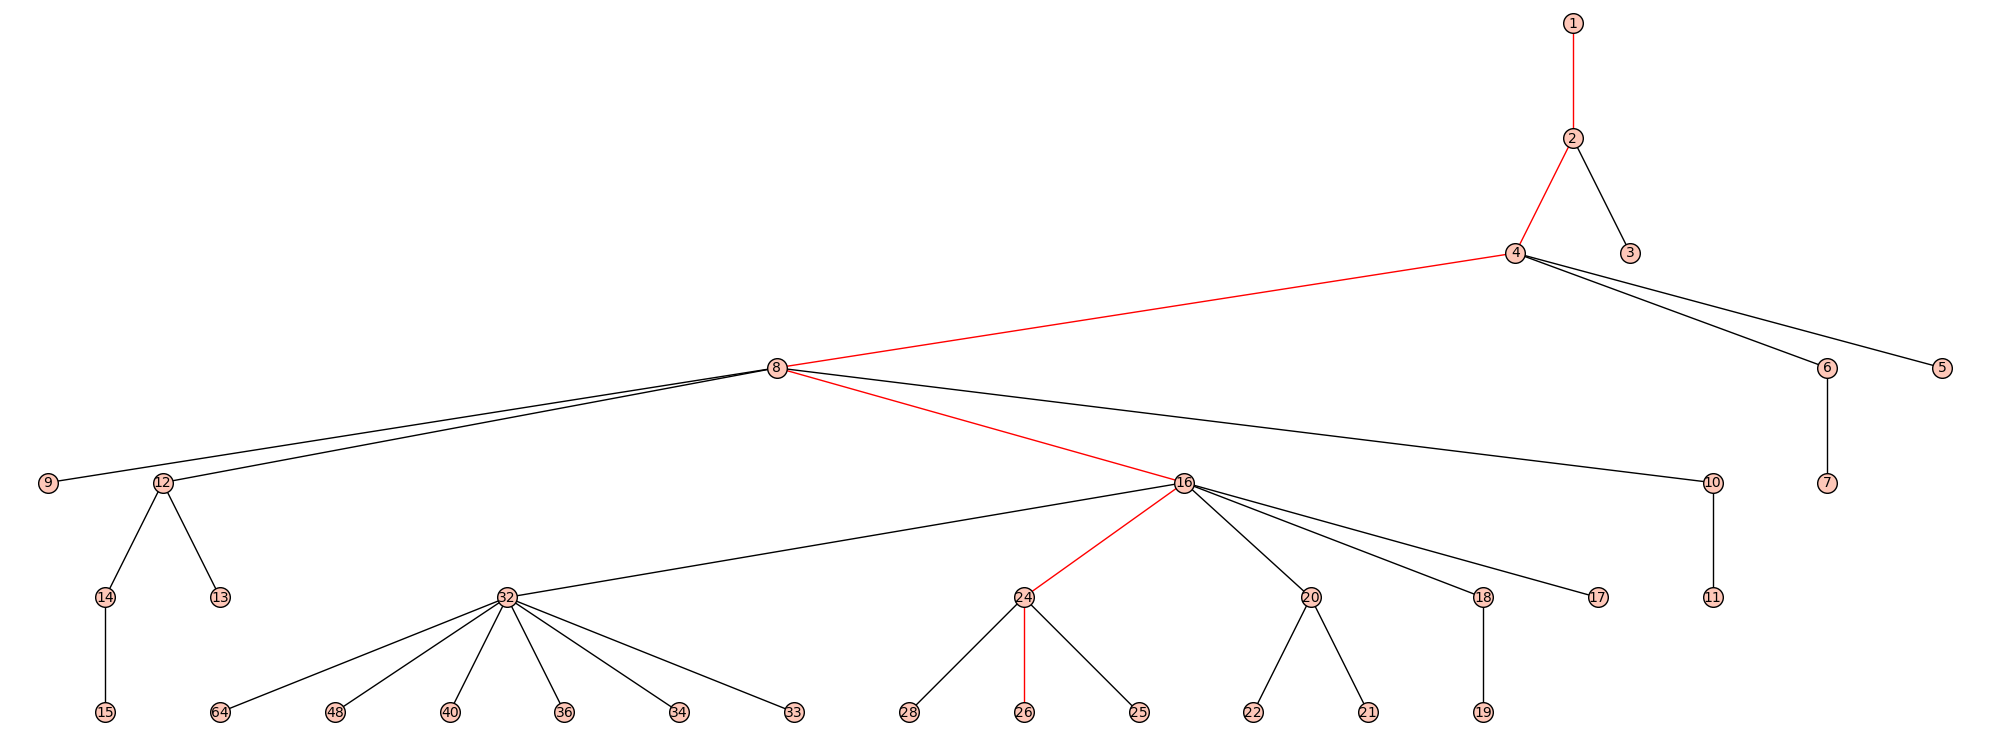

In [120]:
 print_tree_decreasing(7, 26)

Программа нарисовала корректное дерево убывающих степеней.

Нарисуем дерево 8-го уровня и найдем в нем число 37:

Путь: [1, 2, 4, 8, 16, 32, 36, 37]


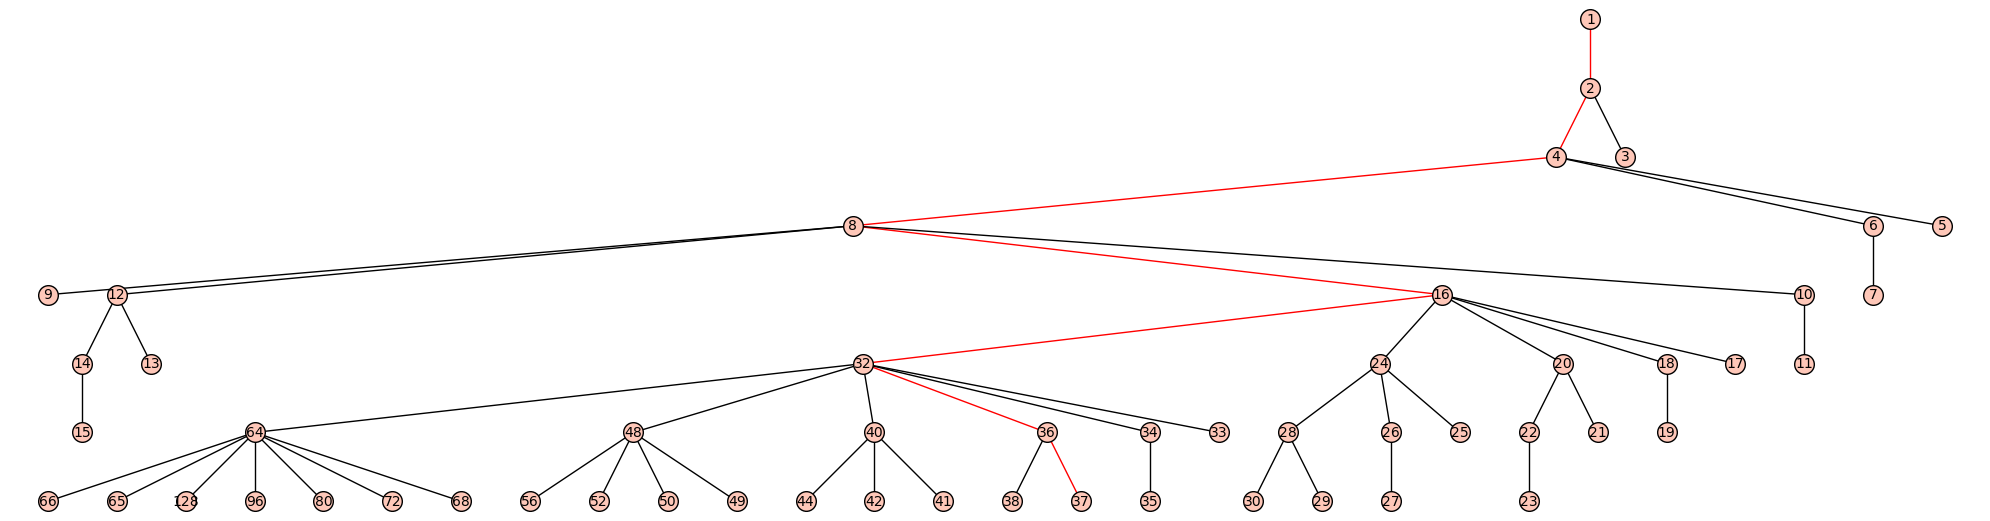

In [121]:
 print_tree_decreasing(8, 37)

Программа нарисовала корректное дерево убывающих степеней.

Нарисуем дерево 10-го уровня и найдем в нем число 89:

Путь: [1, 2, 4, 8, 16, 32, 64, 80, 88, 89]


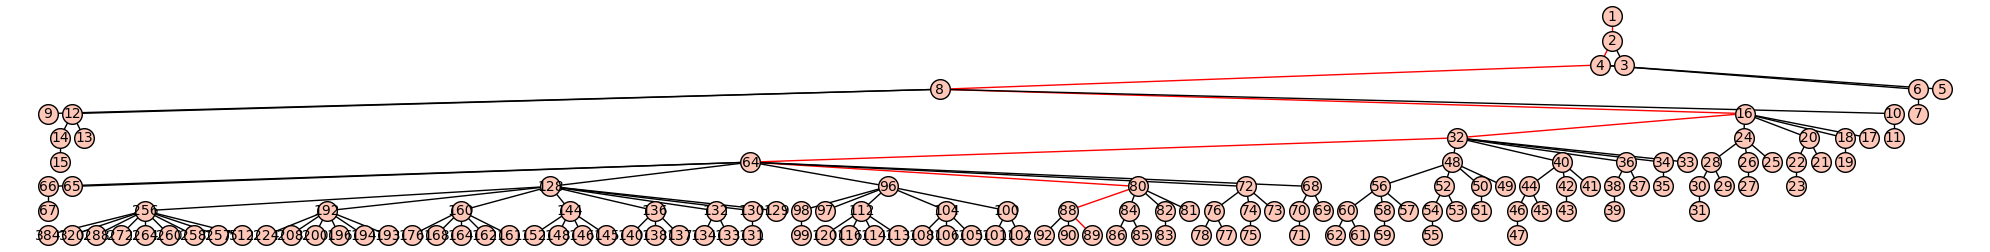

In [122]:
 print_tree_decreasing(10, 89)

Программа нарисовала корректное дерево убывающих степеней.

Напишем функцию, которая установит, что данное дерево дает столько же умножений, сколько и при бинарном методе "SX", на первых 1000 числах.

In [132]:
def comparison_method_SX_and_tree():
    # Построение дерева до 18 уровня
    tree = build_tree_decreasing(18)
    # Сравнение с методом SX
    for number in range(2, 1001):
        path_edge, path_nodes = get_edge_path_decreasing(tree, number)
        result, count_iter = sx_method(number)
        if (len(path_nodes) - 1) != count_iter:
            print("Алгоритм <<дерево убывающих степеней>> не всегда дает столько же умножений, сколько и бинарный метод <<SX>>.")
            print("На числе", number, "данное утверждение не соблюдается.")
    print("Алгоритм <<дерево убывающих степеней>> дает столько же умножений, сколько и бинарный метод <<SX>>.")

Вызовем данную функцию.

In [133]:
comparison_method_SX_and_tree()

Алгоритм <<дерево убывающих степеней>> дает столько же умножений, сколько и бинарный метод <<SX>>.


Таким образом, можно сделать вывод, что "дерево обратных степеней" работает за то же количество операций, что и бинарный метод "SX".

## Выводы

В ходе практической работы сформировались знания о работе алгоритмах вычисления одночленов за минимальное число операций. Привит навык использования компьютерной математики для реализации алгоритмов. <br>
Реализован алгоритм бинарного метода "SX", а также алгоритм возведения в степень справа налево. Данные алгоритмы сравнены между собой и в ходе сравнения установлено, что алгоритм "SX" является более быстрым.<br>
Также реализовано "дерево степеней". В ходе сравнений "дерева степеней" с алгоритмами "SX" и возведения в степень справа налево установлено, что "дерево степеней" является самым оптимальным и быстрым, а "дерево убывающих степеней" работает за то же количество операций, что и бинарный метод "SX".